In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [17]:
peak_folder = '/Users/emiliebertholet/cernbox/coldbox_data/selected_waveforms' ## put your own path

sample = 'cosmics'

with open(f'{peak_folder}/selection_{sample}_wlenNone_prom500.pkl', 'rb') as file:
    dic = pickle.load(file)
data = pd.DataFrame(dic)


print(f"{sample}:  {data.shape[0]} peaks, {data.trigger_record.unique().shape[0]} trigger records")
# data.keys()


cosmics:  25150 peaks, 4189 trigger records


In [3]:
data.head()

,trigger_record,waveform_index,height,width,pedestal,waveform
0,0,0,419,195.350000,1303,"[-92, -84, -75, -84, -85, -77, -69, -66, -51, ..."
1,0,1,1148,166.122199,1303,"[-2, 41, 161, 322, 488, 619, 738, 806, 859, 88..."
2,0,2,2252,192.744797,1303,"[89, 391, 788, 1155, 1487, 1780, 1994, 2125, 2..."
3,0,3,462,169.719328,1303,"[-44, -27, 5, 94, 176, 242, 294, 337, 364, 388..."
4,0,4,558,146.478022,1303,"[-30, -16, 10, 65, 151, 252, 340, 374, 401, 47..."


# File Organization

The files contain a dictionary:
- ```trigger_record```: trigger record identifier

- ```waveform_index```: position of the waveform in a given trigger record

- ```height```:  height of the peak after pedestal subtraction

- ```width```: the length of the waveform array 

- ```waveform```: each waveform is an array variable length 

- ```pedestal```:  value of the pedestal in a given trigger record



### How to get the information related to the 4th waveform contained in the trigger record number 93?

height of the peak after pedestal subtraction:  506 ADC
height of the peak before pedestal subtraction: 1849 ADC
width of the wavefrom window: 117.33 tt


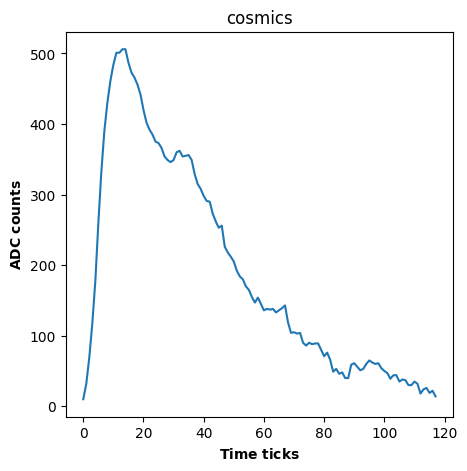

In [31]:
trigger_rec   = 93
waveform_idx = 3

h   = data.loc[(data.trigger_record == trigger_rec) & (data.waveform_index == waveform_idx), 'height'].values[0]
ped = data.loc[(data.trigger_record == trigger_rec) & (data.waveform_index == waveform_idx), 'pedestal'].values[0]
w   = data.loc[(data.trigger_record == trigger_rec) & (data.waveform_index == waveform_idx), 'width'].values[0]
print(f"height of the peak after pedestal subtraction:  {h} ADC")
print(f"height of the peak before pedestal subtraction: {h + ped} ADC")
print(f"width of the wavefrom window: {w:.2f} tt")

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(data.loc[(data.trigger_record == trigger_rec) & (data.waveform_index == waveform_idx), 'waveform'].values[0].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(sample);


### plot all the available waveforms

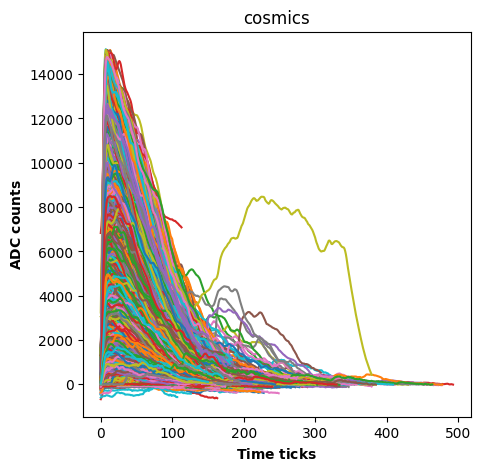

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for wf in data.waveform:
    ax.plot(wf.transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(sample);

### Select few trigger records

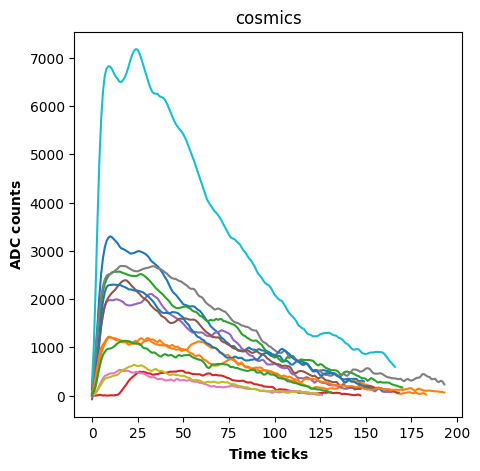

In [ ]:
## trigger records between 1 and 3 
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for wf in data.loc[(data.trigger_record.between(1, 3)), 'waveform']:
    ax.plot(wf.transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(sample);

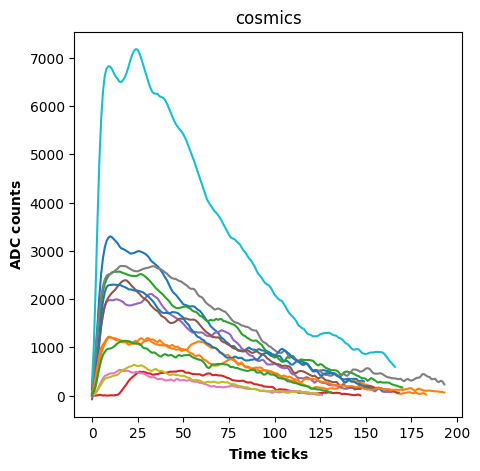

In [ ]:
## trigger records 1, 2, and 3 
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for wf in data.loc[(data.trigger_record.isin([1,2,3])), 'waveform']:
    ax.plot(wf.transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(sample);